In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import patchify
from scipy.ndimage import rotate

In [2]:
OutDIR='/DATA/vito/output/'
DataDIR='/DATA/vito/data/'

fn_img = glob.glob(DataDIR+'drone_ortho/*')
fn_img.sort()
print('Available images:')
for i, fn in enumerate(fn_img):
    print(f'{i}:' + fn.split("/")[-1])
print("---------------")
img_select=int(input("Select a image: "))
image = cv2.imread(fn_img[img_select])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(fn_img[img_select].split("/")[-1]+' imported')

Available images:
0:LaPaya_Apr2024_orthomosaic_5cm_UTM19S_WGS84.tif
1:big_clip.tif
2:small_clip1.tif
3:small_clip2.tif
---------------


LaPaya_Apr2024_orthomosaic_5cm_UTM19S_WGS84.tif imported


In [3]:
crop_size=512

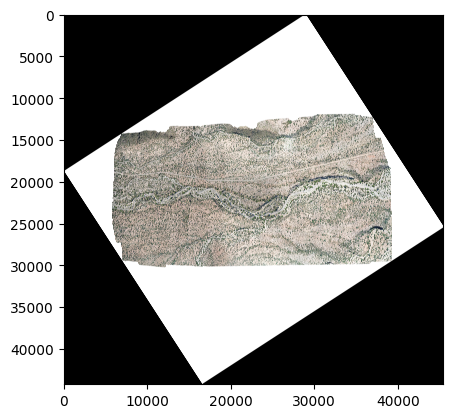

In [4]:
rotated_image = rotate(image, angle=33, reshape=True)
plt.imshow(rotated_image)

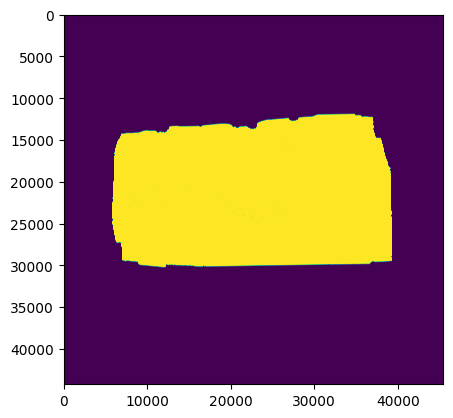

In [5]:
#create mask to crop out empty space
sum_img=np.sum(rotated_image, axis=2)
valid_mask=[(sum_img!=0)&(sum_img!=765)]
rotated_image[valid_mask[0]==0]=0

#cropping in
notzero_indices = np.nonzero(valid_mask[0])
x_min = np.min(notzero_indices[0]).astype(int)
x_max = np.max(notzero_indices[0]).astype(int)
y_min = np.min(notzero_indices[1]).astype(int)
y_max = np.max(notzero_indices[1]).astype(int)

x_pathces=((x_max-x_min)//crop_size)+1
y_pathces=((y_max-y_min)//crop_size)+1

cleared_image=rotated_image[x_min:x_min+(x_pathces*crop_size), y_min:y_min+(y_pathces*crop_size),:]

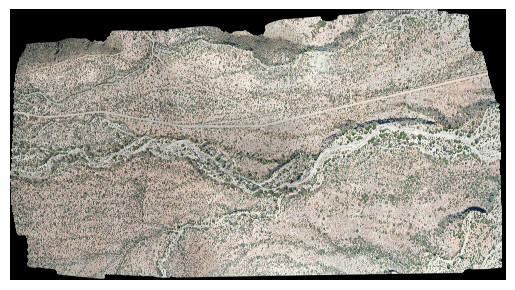

In [6]:
plt.imshow(cleared_image)
plt.axis("off")
plt.show()

In [7]:
pty_img = patchify.patchify(cleared_image, (crop_size,crop_size,image.shape[-1]), step=crop_size)
pty_img.shape


(36, 66, 1, 512, 512, 3)

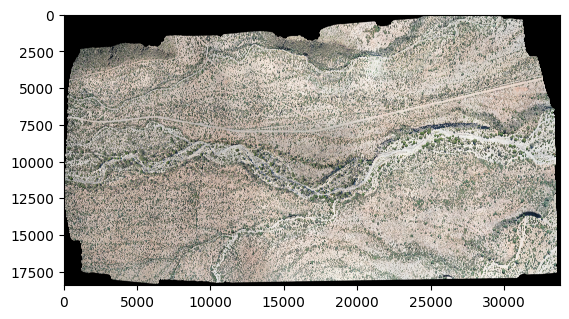

In [8]:
reconstructed_image = patchify.unpatchify(pty_img, cleared_image.shape)
plt.imshow(reconstructed_image)
plt.show()


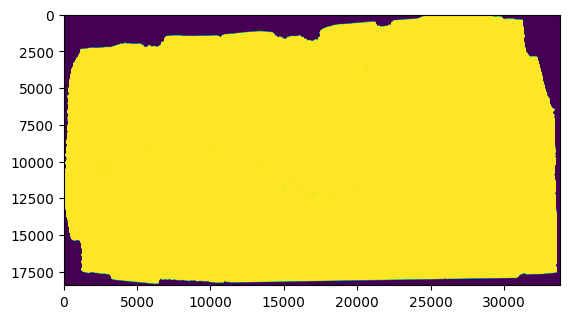

In [12]:
plt.imshow(valid_mask[0][x_min:x_min+(x_pathces*crop_size), y_min:y_min+(y_pathces*crop_size)])
plt.show()

In [9]:
np.unique(reconstructed_image==cleared_image)

array([ True])

In [10]:
np.save(DataDIR+'drone_ortho/512patched_LaPaya.npy',pty_img)

In [13]:
np.save(DataDIR+'drone_ortho/512patched_mask.npy',valid_mask[0][x_min:x_min+(x_pathces*crop_size), y_min:y_min+(y_pathces*crop_size)])